In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import warnings
from scipy.stats import skew, kurtosis
warnings.filterwarnings('ignore')

In [2]:
combined_df = pd.read_csv("C://Users/nilsa/Desktop/arabam_car_price_prediction/merged_dataset.csv")

In [3]:
combined_df

,adv_no,price,adv_date,car_brand,car_series,car_model,year,km,gear_type,fuel_type,...,acceleration,max_power,min_power,torque,city_fuel_consumption,highway_fuel_consumption,seats,trunk_capacity,aks_range,url
0,28213512.0,745000.0,08 Mart 2025,Fiat,Egea,1.6 Multijet Easy,2021.0,136.000 km,Düz,Dizel,...,"9,6",3750.0,1500.0,320.0,NaN,NaN,5.0,520.0,2636.0,https://www.arabam.com/ilan/galeriden-satilik-...
1,28061269.0,649500.0,08 Mart 2025,Renault,Clio,1.5 dCi SportTourer Joy,2017.0,140.000 km,Düz,Dizel,...,"14,3",4000.0,1750.0,200.0,"4,3","3,2",5.0,443.0,2589.0,https://www.arabam.com/ilan/galeriden-satilik-...
2,28061354.0,739500.0,08 Mart 2025,Fiat,Egea,1.3 Multijet Easy,2021.0,115.000 km,Düz,Dizel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.arabam.com/ilan/galeriden-satilik-...
3,28248124.0,759000.0,07 Mart 2025,Opel,Astra,1.6 CDTI Elite,2016.0,189.500 km,Otomatik,Dizel,...,"11,6",3500.0,2000.0,320.0,"6,4","4,3",5.0,420.0,2685.0,https://www.arabam.com/ilan/galeriden-satilik-...
4,28247848.0,375000.0,07 Mart 2025,Renault,Megane,1.5 dCi Extreme,2007.0,313.000 km,Düz,Dizel,...,"14,5",4000.0,2000.0,185.0,"5,7","4,1",5.0,520.0,2686.0,https://www.arabam.com/ilan/galeriden-satilik-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,27727649.0,1500000.0,08 Mart 2025,Mercedes - Benz,SLK,250,2012.0,76.650 km,Otomatik,Benzin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.arabam.com/ilan/galeriden-satilik-...
2496,27702340.0,615000.0,08 Mart 2025,Peugeot,208,1.4 HDi Active,2013.0,139.000 km,Otomatik,Dizel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.arabam.com/ilan/galeriden-satilik-...
2497,27694719.0,945000.0,08 Mart 2025,Renault,Megane,1.5 dCi Icon,2019.0,103.500 km,Otomatik,Dizel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.arabam.com/ilan/galeriden-satilik-...
2498,27537905.0,1165000.0,08 Mart 2025,Renault,Megane,1.5 Blue DCI Touch,2021.0,112.000 km,Otomatik,Dizel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.arabam.com/ilan/galeriden-satilik-...


In [4]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   adv_no                    2495 non-null   float64
 1   price                     2495 non-null   float64
 2   adv_date                  2495 non-null   object 
 3   car_brand                 2495 non-null   object 
 4   car_series                2495 non-null   object 
 5   car_model                 2489 non-null   object 
 6   year                      2495 non-null   float64
 7   km                        2495 non-null   object 
 8   gear_type                 2493 non-null   object 
 9   fuel_type                 2495 non-null   object 
 10  carbody_type              2493 non-null   object 
 11  color                     2495 non-null   object 
 12  car_capacity              2459 non-null   object 
 13  engine_power              2465 non-null   object 
 14  engine_t

In [5]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   adv_no                    2495 non-null   float64
 1   price                     2495 non-null   float64
 2   adv_date                  2495 non-null   object 
 3   car_brand                 2495 non-null   object 
 4   car_series                2495 non-null   object 
 5   car_model                 2489 non-null   object 
 6   year                      2495 non-null   float64
 7   km                        2495 non-null   object 
 8   gear_type                 2493 non-null   object 
 9   fuel_type                 2495 non-null   object 
 10  carbody_type              2493 non-null   object 
 11  color                     2495 non-null   object 
 12  car_capacity              2459 non-null   object 
 13  engine_power              2465 non-null   object 
 14  engine_t

In [6]:
# Rename dictionary: Old column name -> Desired column name
rename_dict = {
    "adv_no": "Ad Number",
    "price":"Price",
    "adv_date": "Ad Date",
    "car_brand": "Brand",
    "car_series": "Series",
    "car_model": "Model",
    "year": "Year",
    "km": "Kilometer",
    "gear_type": "Gear Type",
    "fuel_type": "Fuel Type",
    "carbody_type": "Body Type",
    "color": "Color",
    "car_capacity": "Engine Capacity (cc)",
    "engine_power": "Engine Power (hp)",
    "engine_trac": "Traction",
    "car_cond": "Car Condition",
    "mean_fuel_cons": "Average Fuel Consumption (lt)",
    "fuel_storage": "Fuel Tank (lt)",
    "paint_change": "Paint-changing",
    "trade_in": "Tradeable",
    "seller": "Seller",
    "warranty": "Warranty Status",
    "car_class": "Vehicle Class",
    "max_speed": "Maximum Speed ​​(km/h)",
    "acceleration": "Acceleration (0-100) (sec)",
    "max_power": "Maximum Power (rpm)",
    "min_power": "Minimum Power (rpm)",
    "torque": "Torque (nm)",
    "city_fuel_consumption": "City Fuel Consumption (lt)",
    "highway_fuel_consumption": "Highway Fuel Consumption (lt)",
    "seats": "Seats",
    "trunk_capacity": "Baggage Volume (lt)",
    "aks_range": "Axle Spacing (mm)"
}

combined_df.rename(columns=rename_dict, inplace=True)

print("New column names:\n", combined_df.columns)

New column names:
 Index(['Ad Number', 'Price', 'Ad Date', 'Brand', 'Series', 'Model', 'Year',
       'Kilometer', 'Gear Type', 'Fuel Type', 'Body Type', 'Color',
       'Engine Capacity (cc)', 'Engine Power (hp)', 'Traction',
       'Car Condition', 'Paint-changing', 'Average Fuel Consumption (lt)',
       'Fuel Tank (lt)', 'Tradeable', 'Seller', 'Warranty Status',
       'Vehicle Class', 'Maximum Speed ​​(km/h)', 'Acceleration (0-100) (sec)',
       'Maximum Power (rpm)', 'Minimum Power (rpm)', 'Torque (nm)',
       'City Fuel Consumption (lt)', 'Highway Fuel Consumption (lt)', 'Seats',
       'Baggage Volume (lt)', 'Axle Spacing (mm)', 'url'],
      dtype='object')


In [7]:
# EDA
combined_df = combined_df.dropna(subset=['Ad Number'])

In [8]:
combined_df.isnull().sum()

Ad Number                           0
Price                               0
Ad Date                             0
Brand                               0
Series                              0
Model                               6
Year                                0
Kilometer                           0
Gear Type                           2
Fuel Type                           0
Body Type                           2
Color                               0
Engine Capacity (cc)               36
Engine Power (hp)                  30
Traction                           25
Car Condition                       5
Paint-changing                      0
Average Fuel Consumption (lt)     864
Fuel Tank (lt)                    754
Tradeable                         568
Seller                              0
Warranty Status                  2495
Vehicle Class                     736
Maximum Speed ​​(km/h)            764
Acceleration (0-100) (sec)        777
Maximum Power (rpm)               960
Minimum Powe

In [9]:
#check the effect of paint and changing number on the price
combined_df['Paint-changing'].unique()

array(['Tamamı orjinal', '2 değişen, 2 boyalı', '5 boyalı',
       '1 değişen, 6 boyalı', '3 boyalı', '1 değişen, 7 boyalı',
       '1 değişen, 5 boyalı', '1 değişen, 8 boyalı',
       '2 değişen, 8 boyalı', 'Belirtilmemiş', '4 boyalı', '2 boyalı',
       '3 değişen, 7 boyalı', '1 boyalı', '8 boyalı', '7 boyalı',
       '1 değişen', '1 değişen, 3 boyalı', '1 değişen, 2 boyalı',
       '2 değişen', '4 değişen, 3 boyalı', '1 değişen, 4 boyalı',
       '3 değişen, 4 boyalı', '1 değişen, 1 boyalı',
       '3 değişen, 9 boyalı', '10 boyalı', '4 değişen, 5 boyalı',
       '2 değişen, 3 boyalı', '2 değişen, 6 boyalı',
       '2 değişen, 5 boyalı', '6 boyalı', '1 değişen, 12 boyalı',
       '11 boyalı', '1 değişen, 10 boyalı', '3 değişen',
       '2 değişen, 7 boyalı', '4 değişen, 7 boyalı', '12 boyalı',
       '1 değişen, 9 boyalı', '2 değişen, 4 boyalı',
       '3 değişen, 1 boyalı', '3 değişen, 2 boyalı', 'Tamamı boyalı',
       '4 değişen, 1 boyalı', '2 değişen, 1 boyalı',
       '5 değişe

In [10]:
import pandas as pd
import numpy as np

#Creating 'changed number' and 'painted number' columns
combined_df['Change Number'] = combined_df['Paint-changing'].str.extract(r'(\d+)\s*değişen').astype(float)
combined_df['Painted Number'] = combined_df['Paint-changing'].str.extract(r'(\d+)\s*boyalı').astype(float)

# "Belirtilmemiş" veya "Tamamı orjinal" gibi değerleri 0 ile doldurma
combined_df['Change Number'] = combined_df['Change Number'].where(~combined_df['Paint-changing'].isin(['Belirtilmemiş', 'Tamamı orjinal']), 0)
combined_df['Painted Number'] = combined_df['Painted Number'].where(~combined_df['Paint-changing'].isin(['Belirtilmemiş', 'Tamamı orjinal']), 0)

# Sonuçları yazdırma
combined_df


,Ad Number,Price,Ad Date,Brand,Series,Model,Year,Kilometer,Gear Type,Fuel Type,...,Minimum Power (rpm),Torque (nm),City Fuel Consumption (lt),Highway Fuel Consumption (lt),Seats,Baggage Volume (lt),Axle Spacing (mm),url,Change Number,Painted Number
0,28213512.0,745000.0,08 Mart 2025,Fiat,Egea,1.6 Multijet Easy,2021.0,136.000 km,Düz,Dizel,...,1500.0,320.0,NaN,NaN,5.0,520.0,2636.0,https://www.arabam.com/ilan/galeriden-satilik-...,0.0,0.0
1,28061269.0,649500.0,08 Mart 2025,Renault,Clio,1.5 dCi SportTourer Joy,2017.0,140.000 km,Düz,Dizel,...,1750.0,200.0,"4,3","3,2",5.0,443.0,2589.0,https://www.arabam.com/ilan/galeriden-satilik-...,2.0,2.0
2,28061354.0,739500.0,08 Mart 2025,Fiat,Egea,1.3 Multijet Easy,2021.0,115.000 km,Düz,Dizel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.arabam.com/ilan/galeriden-satilik-...,NaN,5.0
3,28248124.0,759000.0,07 Mart 2025,Opel,Astra,1.6 CDTI Elite,2016.0,189.500 km,Otomatik,Dizel,...,2000.0,320.0,"6,4","4,3",5.0,420.0,2685.0,https://www.arabam.com/ilan/galeriden-satilik-...,1.0,6.0
4,28247848.0,375000.0,07 Mart 2025,Renault,Megane,1.5 dCi Extreme,2007.0,313.000 km,Düz,Dizel,...,2000.0,185.0,"5,7","4,1",5.0,520.0,2686.0,https://www.arabam.com/ilan/galeriden-satilik-...,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,27727649.0,1500000.0,08 Mart 2025,Mercedes - Benz,SLK,250,2012.0,76.650 km,Otomatik,Benzin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.arabam.com/ilan/galeriden-satilik-...,1.0,6.0
2496,27702340.0,615000.0,08 Mart 2025,Peugeot,208,1.4 HDi Active,2013.0,139.000 km,Otomatik,Dizel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.arabam.com/ilan/galeriden-satilik-...,NaN,3.0
2497,27694719.0,945000.0,08 Mart 2025,Renault,Megane,1.5 dCi Icon,2019.0,103.500 km,Otomatik,Dizel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.arabam.com/ilan/galeriden-satilik-...,1.0,1.0
2498,27537905.0,1165000.0,08 Mart 2025,Renault,Megane,1.5 Blue DCI Touch,2021.0,112.000 km,Otomatik,Dizel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.arabam.com/ilan/galeriden-satilik-...,NaN,3.0


In [11]:
#boş satırlar ve numeric değerlerin formatlarının düzenlenmesi
combined_df['Kilometer'] = combined_df['Kilometer'].str.replace(' km', '').str.replace('.', '').astype(float)
combined_df['Kilometer'].unique()

array([ 136000.,  140000.,  115000.,  189500.,  313000.,  162000.,
         56000.,   81535.,  177000.,  183000.,   72000.,  268000.,
         97500.,   46000.,  330000.,  194000.,   18000.,   85000.,
        185000.,  101000.,   23000.,   16000.,   71000.,   44144.,
        174000.,  221000.,  210000.,  122000.,  255000.,  132000.,
         92000.,  104000.,  214000.,  105348.,  123000.,   41000.,
         84000.,  337000.,  171000.,  163000.,   90000.,  205000.,
         44000.,   36000.,  130000.,  208000.,  134000.,  195000.,
        120000.,   30000.,  139000.,  100000.,   98000.,  196000.,
        125000.,  237000.,  110000.,  341000.,   74000.,  280000.,
        240000.,    6800.,  117000.,   80000.,  128000.,   70000.,
        250000.,   94000.,   97000.,    9000.,  105000.,  285000.,
        275000.,   65000.,   79000.,  335000.,  345000.,   95000.,
        175000.,  172500.,   74260.,  204750.,  685000.,  225000.,
         33000.,  218000.,  170000.,  261000.,  106500.,  1530

In [12]:
combined_df['Average Fuel Consumption (lt)'] = combined_df['Average Fuel Consumption (lt)'].str.replace(' lt', '').str.replace(',', '.').astype(float)
combined_df['Average Fuel Consumption (lt)'].unique()


array([ 4.3,  3.6,  nan,  5.1,  4.6,  4. ,  3.5,  3.9,  4.2,  5.3,  7.9,
        6.1,  6. ,  5.5,  3.8,  4.1,  4.4,  5.4,  8.1,  3.7,  4.5,  5. ,
        6.6,  5.6,  6.3,  7. ,  8.6,  6.2,  6.7,  4.7,  5.9,  7.5,  9.2,
        6.9,  8.4,  6.5,  9.1, 11.5,  7.1,  4.9,  5.7,  6.4, 11.1, 10.4,
        8.5,  7.3,  7.2,  7.4,  4.8,  9.8, 11.8, 12.7, 11.4,  7.6,  6.8,
       10.3, 11. , 17. , 11.7,  5.8, 10.7, 13.4,  8.7,  5.2,  8.3,  9. ,
        8.8, 14.3,  8. ,  7.7,  9.7, 12.4,  3.4,  8.2,  7.8,  3.2, 11.3,
        9.6, 10. , 10.9, 13.3, 13.2])

In [13]:
combined_df['Acceleration (0-100) (sec)'] = combined_df['Acceleration (0-100) (sec)'].str.replace(',', '.').astype(float)
combined_df['Acceleration (0-100) (sec)'].unique()


array([ 9.6, 14.3,  nan, 11.6, 14.5, 12. , 11. ,  9.8, 10.8, 10.1,  9. ,
       13.6, 12.2, 12.4, 10.9, 12.5, 11.7, 11.2, 11.8, 11.3, 10.5, 11.1,
        8.3, 12.9, 16.5, 14.9, 10.2,  8.1, 13.4, 11.5, 17.9, 10.7, 12.8,
       13.2,  8.6, 13.9, 10. , 15. , 10.4, 17.8, 13.1,  8.5, 12.3, 12.7,
        9.7,  9.9, 14. , 14.2, 11.9, 12.6,  4.5,  7.2,  9.1, 14.7, 13.5,
       13.8, 13.7, 15.9,  8.2,  3.8,  7.7,  7.4, 13.3,  3.2,  9.5,  9.4,
       13. ,  7.9, 18.5, 15.3, 10.3, 16.7,  8.4, 15.5,  6.9,  6.2,  5.5,
        2.8,  6.3,  6.4, 14.6,  8.9,  3.6,  4. ,  5.3, 16.4,  9.2,  3.3,
        6.5,  5.9, 14.8,  7.1,  8. ,  9.3, 10.6, 12.1, 15.7, 15.2, 15.4,
        7.6, 17.1,  8.7, 11.4, 16. ,  5.7,  4.3,  2.9,  7.5, 15.6,  7.3,
       17. ,  6.6,  5. ,  4.8, 15.1, 18. ,  7.8, 14.4,  6. ,  3.9,  6.8,
        7. ,  3.4,  6.7])

In [14]:
combined_df['City Fuel Consumption (lt)'] = combined_df['City Fuel Consumption (lt)'].str.replace(',', '.').astype(float)
combined_df['City Fuel Consumption (lt)'].unique()


array([ nan,  4.3,  6.4,  5.7,  4.4,  3.3,  4.5,  4.9,  4.8, 10.3,  7.8,
        4.7,  5.1,  8.1,  7.2,  4.2,  8.5,  4.6,  5.2,  5.5,  6.6, 11.1,
        6.7,  6.8, 11. ,  6.3,  8.2,  7.9,  7.1,  5.3,  6.5,  9.7, 11.9,
        8.3,  9.1,  4.1,  8.4,  7.5,  8.7,  7.7, 10.5,  4. ,  5.9,  5. ,
        3.9,  6.9, 13.4,  5.8,  9.5, 10.9,  9.8, 11.4,  9.2, 12.6, 17.2,
        8.9, 11.2,  6. ,  5.6,  7.4,  7. ,  6.1,  7.6, 13. , 15.2, 11.8,
        9.9,  5.4,  9.4,  9. , 18.1, 19.1, 16.5,  7.3, 14.6, 14.4, 16.2,
       14.5, 20. , 17.9, 10.4, 10.6, 19.4,  8. , 12.5, 11.5,  6.2,  8.6,
       12.9, 10.2,  8.8,  9.6, 13.9, 10. ,  9.3, 12.4, 14.3, 12.8, 12.1,
       12.7, 16. , 10.7,  3.5, 12. , 11.3, 12.2,  3.7, 10.1, 13.7, 15.5,
       19.7, 19. ])

In [15]:
combined_df['Highway Fuel Consumption (lt)'] = combined_df['Highway Fuel Consumption (lt)'].str.replace(',', '.').astype(float)
combined_df['Highway Fuel Consumption (lt)'].unique()

array([ nan,  3.2,  4.3,  4.1,  3.7,  3.6,  3.5,  3.9,  3.4,  4.7,  6.4,
        5.1,  5. ,  4.5,  4. ,  6.7,  3.3,  4.6,  6.2,  5.7,  5.4,  6.6,
        5.5,  5.2,  5.3,  4.9,  5.8,  3.8,  7. ,  4.2,  7.1,  8.3,  6. ,
        4.4,  4.8,  5.9,  5.6,  9.7,  7.7,  6.1,  8.2,  6.3,  9.2,  8.5,
        7.9,  8. , 14. ,  8.4,  6.8,  8.1,  9.5,  6.5,  6.9,  7.8,  7.2,
        7.4,  3.1,  2.9, 11.1])

In [16]:
combined_df['Engine Power (hp)'].unique()

array(['130', '75', '76 - 100 HP', '136', '80', '110', '98',
       '101 - 125 HP', '120', '115', '100', '83', '140', '90',
       '251 - 275 HP', '126 - 150 HP', '128', '95', '105', '218', '65',
       '163', '116', '176 - 200 HP', '125', '151 - 175 HP', '102',
       '501 - 525 HP', '84', '160', '150', '101', '60', '132', '97', '68',
       '82', nan, '156', '226 - 250 HP', '93', '435', '340', '245', '86',
       '107', '129', '-', '70', '77', '122', '112', '601', '526 - 550 HP',
       '170', '204', '401 - 425 HP', '71', '175', '625', '126', '54',
       '124', '96', '180', '66', '69', '67', '76', '73', '231', '272',
       '376 - 400 HP', '700', '326 - 350 HP', '306', '279', '92', '88',
       '192', '276 - 300 HP', '585', '201 - 225 HP', '224', '200', '490',
       '476 - 500 HP', '355', '72', '99', '165', '91', '301 - 325 HP',
       '307', '135', '184', '320', '315', '85', '121', '109', '117',
       '450', '551 - 575 HP', '240', '123', '51 - 75 HP', '111', '58',
       '81', '2

In [17]:
import numpy as np
import pandas as pd

def convert_hp(value):
    if pd.isna(value) or value == "-" or value.strip() == "":  # If missing or empty
        return np.nan

    value = str(value).replace(" HP'ye kadar", "").replace("HP", "").strip() # Clear HP word
    
    if "-" in value:  # If there is a gap
        try:
            low, high = value.split("-")  # Separate two numbers in range
            return (float(low.strip()) + float(high.strip())) / 2  # Take the average
        except ValueError:
            return np.nan  # If it is not a number, make it NaN

    try:
        return float(value)  # If it is an odd number, convert it directly to float
    except ValueError:
        return np.nan  # If it is not a number, make it NaN

combined_df["Engine Power (hp)"] = combined_df["Engine Power (hp)"].apply(convert_hp)

In [18]:
combined_df['Engine Power (hp)'].unique()

array([130.,  75.,  88., 136.,  80., 110.,  98., 113., 120., 115., 100.,
        83., 140.,  90., 263., 138., 128.,  95., 105., 218.,  65., 163.,
       116., 188., 125., 102., 513.,  84., 160., 150., 101.,  60., 132.,
        97.,  68.,  82.,  nan, 156., 238.,  93., 435., 340., 245.,  86.,
       107., 129.,  70.,  77., 122., 112., 601., 538., 170., 204., 413.,
        71., 175., 625., 126.,  54., 124.,  96., 180.,  66.,  69.,  67.,
        76.,  73., 231., 272., 388., 700., 338., 306., 279.,  92., 192.,
       288., 585., 213., 224., 200., 490., 488., 355.,  72.,  99., 165.,
        91., 313., 307., 135., 184., 320., 315.,  85., 121., 109., 117.,
       450., 563., 240., 123.,  63., 111.,  58.,  81., 275., 197.,  50.,
       190., 177., 152., 310., 523., 422., 717., 720., 292., 265., 118.,
       225.,  55., 193., 114., 258., 349., 127., 211., 317., 363., 588.,
       420., 463., 438.,  94., 106.,  78., 143., 147., 139., 108.,  53.,
       217., 400., 761., 133.,  87., 182., 367., 25

In [19]:
combined_df['Engine Capacity (cc)'].unique()

array(['1598', '1461', '1201 - 1400 cm3', '1798', '1601 - 1800 cm3',
       '1499', '1390', '1332', '1401 - 1600 cm3', '1584', '1368',
       "1200 cm3' e kadar", '1199', '999', '1801 - 2000 cm3', '1582',
       '1248', '898', '2987', '1197', '1500', '1596', '1240',
       '2501 - 3000 cm3', '1149', '1490', '-', '1206', '1498', '1991',
       '1595', '1388', '1389', '1399', '1493', nan, '1329', '1597',
       '3001 - 3500 cm3', '1198', '1560', '2487', '1422', '1998', '1587',
       '1364', '3993', '2925', '3724', '1341', '1396', '1995', '1395',
       '2143', '1468', '1581', '1968', '4395', '1289', '1398', '1599',
       '1086', '998', '1997', '3498', '1397', '3501 - 4000 cm3', '3800',
       '4001 - 4500 cm3', '4966', '4266', '1339', '1565', '1489', '5461',
       '2001 - 2500 cm3', '3199', '2497', '4308', '5001 - 5500 cm3',
       '3824', '1799', '1360', '1495', '4501 - 5000 cm3', '1764',
       '5501 - 6000 cm3', '4973', '1796', '3535', '1988', '1496', '1251',
       '1781', '2981',

In [20]:
def convert_cc(value):
    if pd.isna(value) or value == "-" or value.strip() == "":  # If missing or empty
        return np.nan

    value = str(value).replace(" cm3' e kadar", "").replace("cm3", "").strip() # clear cm3 word
    
    if "-" in value: # If there is a gap
        try:
            low, high = value.split("-")  # Separate two numbers in range
            return (float(low.strip()) + float(high.strip())) / 2  # Take the average
        except ValueError:
            return np.nan  # If it is not a number, make it NaN

    try:
        return float(value)  # If it is an odd number, convert it directly to float
    except ValueError:
        return np.nan  # If it is not a number, make it NaN

combined_df["Engine Capacity (cc)"] = combined_df["Engine Capacity (cc)"].apply(convert_cc)


In [21]:
combined_df['Engine Capacity (cc)'].unique()

array([1598. , 1461. , 1300.5, 1798. , 1700.5, 1499. , 1390. , 1332. ,
       1500.5, 1584. , 1368. , 1200. , 1199. ,  999. , 1900.5, 1582. ,
       1248. ,  898. , 2987. , 1197. , 1500. , 1596. , 1240. , 2750.5,
       1149. , 1490. ,    nan, 1206. , 1498. , 1991. , 1595. , 1388. ,
       1389. , 1399. , 1493. , 1329. , 1597. , 3250.5, 1198. , 1560. ,
       2487. , 1422. , 1998. , 1587. , 1364. , 3993. , 2925. , 3724. ,
       1341. , 1396. , 1995. , 1395. , 2143. , 1468. , 1581. , 1968. ,
       4395. , 1289. , 1398. , 1599. , 1086. ,  998. , 1997. , 3498. ,
       1397. , 3750.5, 3800. , 4250.5, 4966. , 4266. , 1339. , 1565. ,
       1489. , 5461. , 2250.5, 3199. , 2497. , 4308. , 5250.5, 3824. ,
       1799. , 1360. , 1495. , 4750.5, 1764. , 5750.5, 4973. , 1796. ,
       3535. , 1988. , 1496. , 1251. , 1781. , 2981. , 1999. , 2171. ,
       1527. , 1242. , 6001. , 2295. , 1592. , 1365. , 1984. , 1996. ,
       3982. , 6167. , 3902. , 1372. , 1895. , 1591. , 2926. ,  996. ,
      

In [22]:
## feature engineering ##
combined_df['Car Age'] = 2025 - combined_df['Year']
combined_df.drop(columns=['Year'], inplace=True)

In [23]:
combined_df.isnull().sum()

Ad Number                           0
Price                               0
Ad Date                             0
Brand                               0
Series                              0
Model                               6
Kilometer                           0
Gear Type                           2
Fuel Type                           0
Body Type                           2
Color                               0
Engine Capacity (cc)               79
Engine Power (hp)                  55
Traction                           25
Car Condition                       5
Paint-changing                      0
Average Fuel Consumption (lt)     864
Fuel Tank (lt)                    754
Tradeable                         568
Seller                              0
Warranty Status                  2495
Vehicle Class                     736
Maximum Speed ​​(km/h)            764
Acceleration (0-100) (sec)        777
Maximum Power (rpm)               960
Minimum Power (rpm)               960
Torque (nm) 

In [24]:
combined_df['Seats'].value_counts()

Seats
5.0    1705
4.0      45
2.0      13
7.0       9
Name: count, dtype: int64

In [25]:
combined_df['Warranty Status'].value_counts()

Series([], Name: count, dtype: int64)

In [26]:
combined_df['Tradeable'].value_counts()

Tradeable
Takasa Uygun          1247
Takasa Uygun Değil     669
-                       11
Name: count, dtype: int64

In [27]:
combined_df['Color'].value_counts()

Color
Beyaz              921
Siyah              425
Gri                412
Füme               137
Kırmızı            119
Mavi               115
Gri (Gümüş)         86
Lacivert            55
Yeşil               33
Gri (metalik)       32
Kahverengi          29
Bordo               27
Mavi (metalik)      25
Bej                 19
Sarı                18
Gri (titanyum)      17
Turuncu              7
Şampanya             6
Yeşil (metalik)      5
Turkuaz              3
Diğer                2
Mor                  2
Name: count, dtype: int64

In [28]:
combined_df['Model'].value_counts()

Model
1.5 dCi Icon            42
1.3 Multijet Easy       41
1.5 dCi Touch           41
1.8 Hybrid Dream        41
1.0 TCe Joy             27
                        ..
1.6 PureTech Opera       1
1.3 Multijet Emotion     1
1.6 Linea Verso          1
1.6 BlueHDi Feel         1
250                      1
Name: count, Length: 959, dtype: int64

In [29]:
combined_df['Series'].value_counts()

Series
Clio               157
Egea               153
Megane             148
Corolla            116
Polo                81
                  ... 
Alto                 1
B-Max                1
Passat Alltrack      1
DS9                  1
John Cooper          1
Name: count, Length: 230, dtype: int64

In [30]:
del_columns = ['Ad Number','Ad Date','Series','Model','Color','Car Condition','Warranty Status','url','Paint-changing']
combined_df.drop(columns=del_columns, inplace=True)

In [31]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2495 entries, 0 to 2499
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Price                          2495 non-null   float64
 1   Brand                          2495 non-null   object 
 2   Kilometer                      2495 non-null   float64
 3   Gear Type                      2493 non-null   object 
 4   Fuel Type                      2495 non-null   object 
 5   Body Type                      2493 non-null   object 
 6   Engine Capacity (cc)           2416 non-null   float64
 7   Engine Power (hp)              2440 non-null   float64
 8   Traction                       2470 non-null   object 
 9   Average Fuel Consumption (lt)  1631 non-null   float64
 10  Fuel Tank (lt)                 1741 non-null   float64
 11  Tradeable                      1927 non-null   object 
 12  Seller                         2495 non-null   object

In [32]:
combined_df.drop_duplicates(inplace=True)

In [33]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2488 entries, 0 to 2498
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Price                          2488 non-null   float64
 1   Brand                          2488 non-null   object 
 2   Kilometer                      2488 non-null   float64
 3   Gear Type                      2486 non-null   object 
 4   Fuel Type                      2488 non-null   object 
 5   Body Type                      2486 non-null   object 
 6   Engine Capacity (cc)           2411 non-null   float64
 7   Engine Power (hp)              2434 non-null   float64
 8   Traction                       2463 non-null   object 
 9   Average Fuel Consumption (lt)  1627 non-null   float64
 10  Fuel Tank (lt)                 1737 non-null   float64
 11  Tradeable                      1923 non-null   object 
 12  Seller                         2488 non-null   object

In [34]:
combined_df.isnull().sum()

Price                              0
Brand                              0
Kilometer                          0
Gear Type                          2
Fuel Type                          0
Body Type                          2
Engine Capacity (cc)              77
Engine Power (hp)                 54
Traction                          25
Average Fuel Consumption (lt)    861
Fuel Tank (lt)                   751
Tradeable                        565
Seller                             0
Vehicle Class                    734
Maximum Speed ​​(km/h)           762
Acceleration (0-100) (sec)       775
Maximum Power (rpm)              956
Minimum Power (rpm)              956
Torque (nm)                      742
City Fuel Consumption (lt)       837
Highway Fuel Consumption (lt)    837
Seats                            721
Baggage Volume (lt)              762
Axle Spacing (mm)                742
Change Number                    674
Painted Number                   120
Car Age                            0
d

In [35]:
# Delete rows with NaN (blank) in the 'Gear Type' column
combined_df = combined_df.dropna(subset=['Gear Type'])

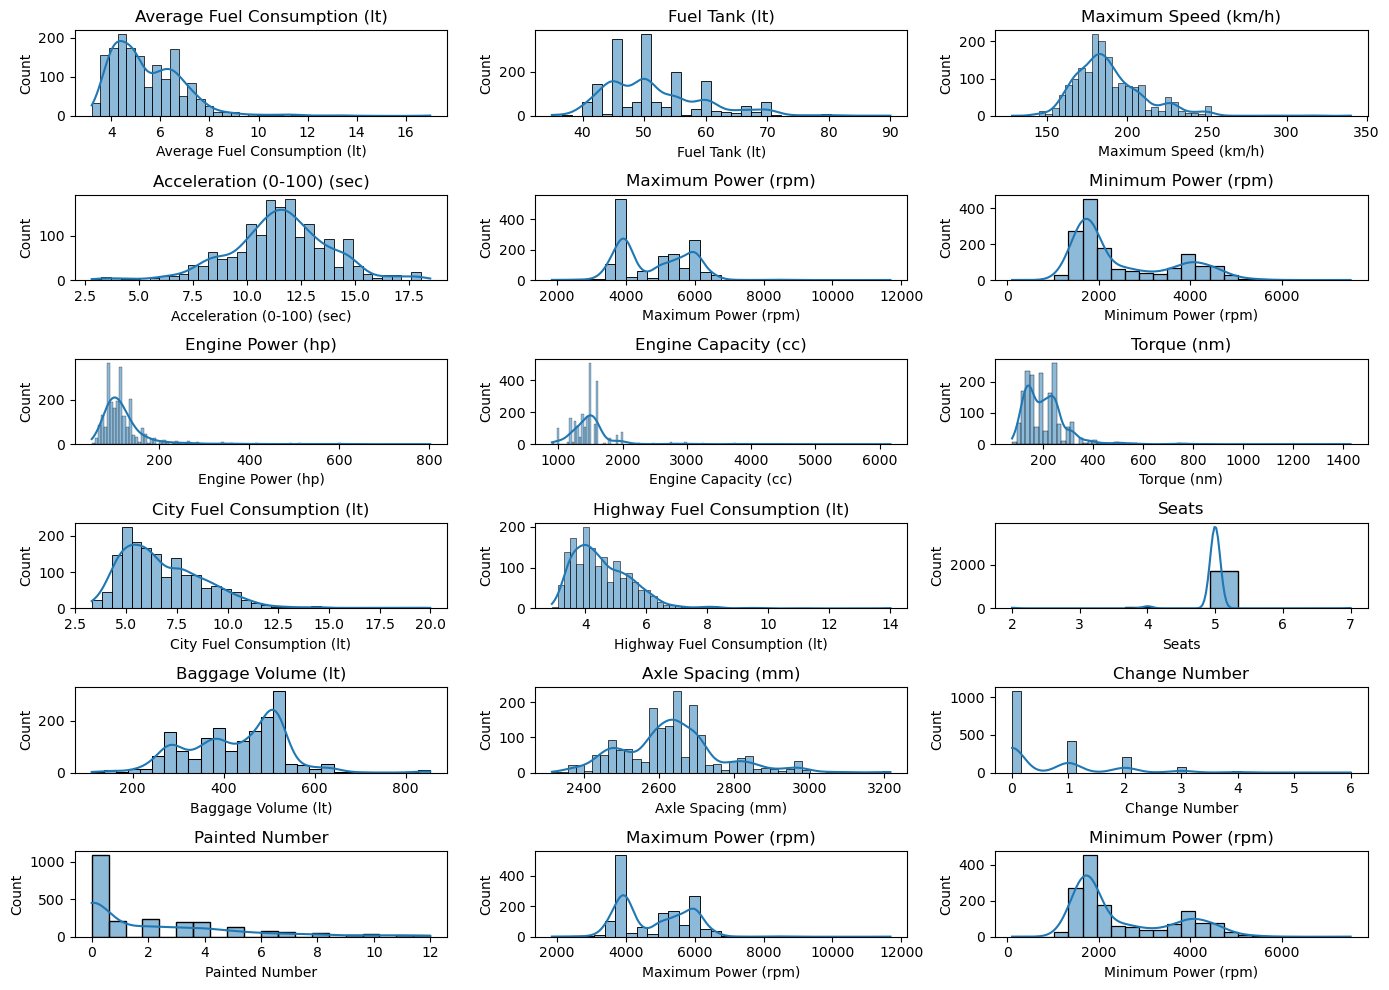

In [36]:
# Let's examine the distribution of numerical values ​​to decide how to fill in the gaps
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ["Average Fuel Consumption (lt)", "Fuel Tank (lt)", "Maximum Speed ​​(km/h)", 
                "Acceleration (0-100) (sec)", "Maximum Power (rpm)", "Minimum Power (rpm)", 
                "Engine Power (hp)", "Engine Capacity (cc)", "Torque (nm)", "City Fuel Consumption (lt)", 
                "Highway Fuel Consumption (lt)", "Seats", "Baggage Volume (lt)", "Axle Spacing (mm)", 
                "Change Number", "Painted Number", "Maximum Power (rpm)", "Minimum Power (rpm)"]

plt.figure(figsize=(14,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(6, 3, i+1)
    sns.histplot(combined_df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


In [37]:
# Use mean for those close to normal distribution
mean_fill_cols = ["Maximum Speed ​​(km/h)", "Acceleration (0-100) (sec)"]
combined_df[mean_fill_cols] = combined_df[mean_fill_cols].fillna(combined_df[mean_fill_cols].mean())

In [38]:
# Use median for right skewed distributions
median_fill_cols = ["Average Fuel Consumption (lt)", "Engine Power (hp)", "Engine Capacity (cc)", 
                    "Torque (nm)","City Fuel Consumption (lt)", "Highway Fuel Consumption (lt)","Painted Number"]

combined_df[median_fill_cols] = combined_df[median_fill_cols].fillna(combined_df[median_fill_cols].median())

In [39]:
# Use mode for categorical numeric variables
mode_fill_cols = ["Fuel Tank (lt)","Baggage Volume (lt)","Axle Spacing (mm)","Change Number","Seats","Maximum Power (rpm)", "Minimum Power (rpm)"]
for col in mode_fill_cols:
    if not combined_df[col].mode().empty:
        combined_df[col] = combined_df[col].fillna(combined_df[col].mode()[0])

In [40]:
combined_df.isnull().sum()

Price                              0
Brand                              0
Kilometer                          0
Gear Type                          0
Fuel Type                          0
Body Type                          0
Engine Capacity (cc)               0
Engine Power (hp)                  0
Traction                          23
Average Fuel Consumption (lt)      0
Fuel Tank (lt)                     0
Tradeable                        563
Seller                             0
Vehicle Class                    732
Maximum Speed ​​(km/h)             0
Acceleration (0-100) (sec)         0
Maximum Power (rpm)                0
Minimum Power (rpm)                0
Torque (nm)                        0
City Fuel Consumption (lt)         0
Highway Fuel Consumption (lt)      0
Seats                              0
Baggage Volume (lt)                0
Axle Spacing (mm)                  0
Change Number                      0
Painted Number                     0
Car Age                            0
d

In [41]:
combined_df=combined_df.dropna(subset=['Traction'])

In [42]:
combined_df.isnull().sum()

Price                              0
Brand                              0
Kilometer                          0
Gear Type                          0
Fuel Type                          0
Body Type                          0
Engine Capacity (cc)               0
Engine Power (hp)                  0
Traction                           0
Average Fuel Consumption (lt)      0
Fuel Tank (lt)                     0
Tradeable                        547
Seller                             0
Vehicle Class                    709
Maximum Speed ​​(km/h)             0
Acceleration (0-100) (sec)         0
Maximum Power (rpm)                0
Minimum Power (rpm)                0
Torque (nm)                        0
City Fuel Consumption (lt)         0
Highway Fuel Consumption (lt)      0
Seats                              0
Baggage Volume (lt)                0
Axle Spacing (mm)                  0
Change Number                      0
Painted Number                     0
Car Age                            0
d

In [43]:
combined_df['Tradeable'].unique()

array(['Takasa Uygun', 'Takasa Uygun Değil', nan, '-'], dtype=object)

In [44]:
# Assign 1 to 'Tradeable' items in the 'Tradeable' column and 0 to others
combined_df['Tradeable'] = combined_df['Tradeable'].apply(lambda x: 1 if x == 'Tradeable' else 0)

In [45]:
combined_df.isnull().sum()

Price                              0
Brand                              0
Kilometer                          0
Gear Type                          0
Fuel Type                          0
Body Type                          0
Engine Capacity (cc)               0
Engine Power (hp)                  0
Traction                           0
Average Fuel Consumption (lt)      0
Fuel Tank (lt)                     0
Tradeable                          0
Seller                             0
Vehicle Class                    709
Maximum Speed ​​(km/h)             0
Acceleration (0-100) (sec)         0
Maximum Power (rpm)                0
Minimum Power (rpm)                0
Torque (nm)                        0
City Fuel Consumption (lt)         0
Highway Fuel Consumption (lt)      0
Seats                              0
Baggage Volume (lt)                0
Axle Spacing (mm)                  0
Change Number                      0
Painted Number                     0
Car Age                            0
d

In [46]:
combined_df["Brand"].unique()

array(['Fiat', 'Renault', 'Opel', 'Toyota', 'Citroen', 'Volkswagen',
       'Hyundai', 'Mitsubishi', 'Skoda', 'Audi', 'Kia', 'Dacia',
       'Alfa Romeo', 'Chrysler', 'Ford', 'Mercedes - Benz', 'Seat', 'BMW',
       'Nissan', 'Peugeot', 'Tesla', 'Chevrolet', 'Lancia', 'Honda',
       'Volvo', 'MINI', 'Lexus', 'Mazda', 'Porsche', 'Tofaş', 'Bentley',
       'Jaguar', 'Ferrari', 'Suzuki', 'Maserati', 'Dodge', 'Joyce',
       'DS Automobiles', 'Cadillac', 'Geely', 'Cupra', 'Proton', 'Tata',
       'Chery', 'The London Taxi', 'Rover', 'Daihatsu'], dtype=object)

In [47]:
combined_df["Gear Type"].unique()

array(['Düz', 'Otomatik', 'Yarı Otomatik'], dtype=object)

In [48]:
combined_df["Fuel Type"].unique()

array(['Dizel', 'Hibrit', 'LPG & Benzin', 'Benzin', 'Elektrik'],
      dtype=object)

In [49]:
combined_df["Body Type"].unique()

array(['Sedan', 'Station wagon', 'Hatchback/5', 'Coupe', 'Cabrio', 'MPV',
       'Roadster', 'Hatchback/3', 'SUV', '-'], dtype=object)

In [50]:
# Find the number of rows with "-"
count = (combined_df['Body Type'] == '-').sum()
print(count)

6


In [51]:
combined_df = combined_df.drop(combined_df[combined_df['Body Type'] == '-'].index)

In [52]:
combined_df.value_counts('Traction')

Traction
Önden Çekiş         2070
Arkadan İtiş         277
4WD (Sürekli)         95
AWD (Elektronik)      11
-                      4
Name: count, dtype: int64

In [53]:
combined_df = combined_df.drop(combined_df[combined_df['Traction'] == '-'].index)

In [54]:
combined_df.value_counts('Seller')

Seller
Galeriden          1504
Sahibinden          928
Yetkili Bayiden      21
Name: count, dtype: int64

In [55]:
combined_df.value_counts('Vehicle Class')

Vehicle Class
C Segment    824
B Segment    569
D Segment    209
E Segment     91
F Segment     28
A Segment     16
G Segment      8
H Segment      3
Name: count, dtype: int64

In [56]:
combined_df.isnull().sum()

Price                              0
Brand                              0
Kilometer                          0
Gear Type                          0
Fuel Type                          0
Body Type                          0
Engine Capacity (cc)               0
Engine Power (hp)                  0
Traction                           0
Average Fuel Consumption (lt)      0
Fuel Tank (lt)                     0
Tradeable                          0
Seller                             0
Vehicle Class                    705
Maximum Speed ​​(km/h)             0
Acceleration (0-100) (sec)         0
Maximum Power (rpm)                0
Minimum Power (rpm)                0
Torque (nm)                        0
City Fuel Consumption (lt)         0
Highway Fuel Consumption (lt)      0
Seats                              0
Baggage Volume (lt)                0
Axle Spacing (mm)                  0
Change Number                      0
Painted Number                     0
Car Age                            0
d

In [57]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2453 entries, 0 to 2498
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Price                          2453 non-null   float64
 1   Brand                          2453 non-null   object 
 2   Kilometer                      2453 non-null   float64
 3   Gear Type                      2453 non-null   object 
 4   Fuel Type                      2453 non-null   object 
 5   Body Type                      2453 non-null   object 
 6   Engine Capacity (cc)           2453 non-null   float64
 7   Engine Power (hp)              2453 non-null   float64
 8   Traction                       2453 non-null   object 
 9   Average Fuel Consumption (lt)  2453 non-null   float64
 10  Fuel Tank (lt)                 2453 non-null   float64
 11  Tradeable                      2453 non-null   int64  
 12  Seller                         2453 non-null   object

In [58]:
combined_df['Vehicle Class'] = combined_df.groupby('Brand')['Vehicle Class'].transform(lambda grp: grp.fillna(grp.mode()[0] if not grp.mode().empty else 'Bilinmiyor'))

In [59]:
combined_df.isnull().sum()

Price                            0
Brand                            0
Kilometer                        0
Gear Type                        0
Fuel Type                        0
Body Type                        0
Engine Capacity (cc)             0
Engine Power (hp)                0
Traction                         0
Average Fuel Consumption (lt)    0
Fuel Tank (lt)                   0
Tradeable                        0
Seller                           0
Vehicle Class                    0
Maximum Speed ​​(km/h)           0
Acceleration (0-100) (sec)       0
Maximum Power (rpm)              0
Minimum Power (rpm)              0
Torque (nm)                      0
City Fuel Consumption (lt)       0
Highway Fuel Consumption (lt)    0
Seats                            0
Baggage Volume (lt)              0
Axle Spacing (mm)                0
Change Number                    0
Painted Number                   0
Car Age                          0
dtype: int64

In [60]:
combined_df.to_csv('arabam_analysis.csv')

In [61]:
combined_df.Brand.value_counts()

Brand
Renault            431
Volkswagen         253
Fiat               250
BMW                170
Mercedes - Benz    143
Opel               139
Toyota             136
Hyundai            124
Peugeot            106
Citroen             97
Ford                96
Audi                93
Skoda               73
Seat                44
Honda               39
Dacia               35
Kia                 35
Chevrolet           28
Tofaş               24
Nissan              20
MINI                16
Volvo               14
Porsche             14
Tesla                9
Suzuki               7
Alfa Romeo           6
Mazda                6
Jaguar               5
Mitsubishi           5
Maserati             4
Tata                 4
Ferrari              3
Chrysler             3
Bentley              3
Dodge                2
Cadillac             2
Cupra                2
Proton               2
Rover                2
Lexus                1
Joyce                1
DS Automobiles       1
Geely                1
Lanci

In [62]:
brand_counts = combined_df["Brand"].value_counts()
combined_df["Brand"] = combined_df["Brand"].apply(lambda x: x if brand_counts[x] >= 40 else "Other")

In [63]:
dummy_df= pd.get_dummies(combined_df, columns = ['Brand', 'Gear Type', 'Fuel Type', 'Body Type', 'Traction', 'Seller', 'Vehicle Class'], dtype='int', drop_first=True)

In [64]:
dummy_df.columns

Index(['Price', 'Kilometer', 'Engine Capacity (cc)', 'Engine Power (hp)',
       'Average Fuel Consumption (lt)', 'Fuel Tank (lt)', 'Tradeable',
       'Maximum Speed ​​(km/h)', 'Acceleration (0-100) (sec)',
       'Maximum Power (rpm)', 'Minimum Power (rpm)', 'Torque (nm)',
       'City Fuel Consumption (lt)', 'Highway Fuel Consumption (lt)', 'Seats',
       'Baggage Volume (lt)', 'Axle Spacing (mm)', 'Change Number',
       'Painted Number', 'Car Age', 'Brand_BMW', 'Brand_Citroen', 'Brand_Fiat',
       'Brand_Ford', 'Brand_Hyundai', 'Brand_Mercedes - Benz', 'Brand_Opel',
       'Brand_Other', 'Brand_Peugeot', 'Brand_Renault', 'Brand_Seat',
       'Brand_Skoda', 'Brand_Toyota', 'Brand_Volkswagen', 'Gear Type_Otomatik',
       'Gear Type_Yarı Otomatik', 'Fuel Type_Dizel', 'Fuel Type_Elektrik',
       'Fuel Type_Hibrit', 'Fuel Type_LPG & Benzin', 'Body Type_Coupe',
       'Body Type_Hatchback/3', 'Body Type_Hatchback/5', 'Body Type_MPV',
       'Body Type_Roadster', 'Body Type_SUV', 'Bo

In [65]:
dummy_df

,Price,Kilometer,Engine Capacity (cc),Engine Power (hp),Average Fuel Consumption (lt),Fuel Tank (lt),Tradeable,Maximum Speed ​​(km/h),Acceleration (0-100) (sec),Maximum Power (rpm),...,Seller_Sahibinden,Seller_Yetkili Bayiden,Vehicle Class_B Segment,Vehicle Class_Bilinmiyor,Vehicle Class_C Segment,Vehicle Class_D Segment,Vehicle Class_E Segment,Vehicle Class_F Segment,Vehicle Class_G Segment,Vehicle Class_H Segment
0,745000.0,136000.0,1598.0,130.0,4.3,50.0,0,212.000000,9.600000,3750.0,...,0,0,0,0,1,0,0,0,0,0
1,649500.0,140000.0,1461.0,75.0,3.6,45.0,0,168.000000,14.300000,4000.0,...,0,0,1,0,0,0,0,0,0,0
2,739500.0,115000.0,1300.5,88.0,5.0,50.0,0,189.215527,11.533742,4000.0,...,0,0,0,0,1,0,0,0,0,0
3,759000.0,189500.0,1598.0,136.0,5.1,56.0,0,200.000000,11.600000,3500.0,...,0,0,0,0,1,0,0,0,0,0
4,375000.0,313000.0,1461.0,80.0,4.6,60.0,0,171.000000,14.500000,4000.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,1125000.0,16000.0,1200.0,88.0,5.0,50.0,0,189.215527,11.533742,4000.0,...,0,0,0,0,1,0,0,0,0,0
2495,1500000.0,76650.0,1700.5,213.0,5.0,50.0,0,189.215527,11.533742,4000.0,...,0,0,0,0,0,1,0,0,0,0
2496,615000.0,139000.0,1300.5,63.0,5.0,50.0,0,189.215527,11.533742,4000.0,...,0,0,1,0,0,0,0,0,0,0
2497,945000.0,103500.0,1500.5,113.0,5.0,50.0,0,189.215527,11.533742,4000.0,...,0,0,1,0,0,0,0,0,0,0


In [66]:
numeric_column_names = combined_df.select_dtypes(include=['number']).columns.tolist()
numeric_column_names=numeric_column_names
numeric_df = combined_df[numeric_column_names]

<Axes: >

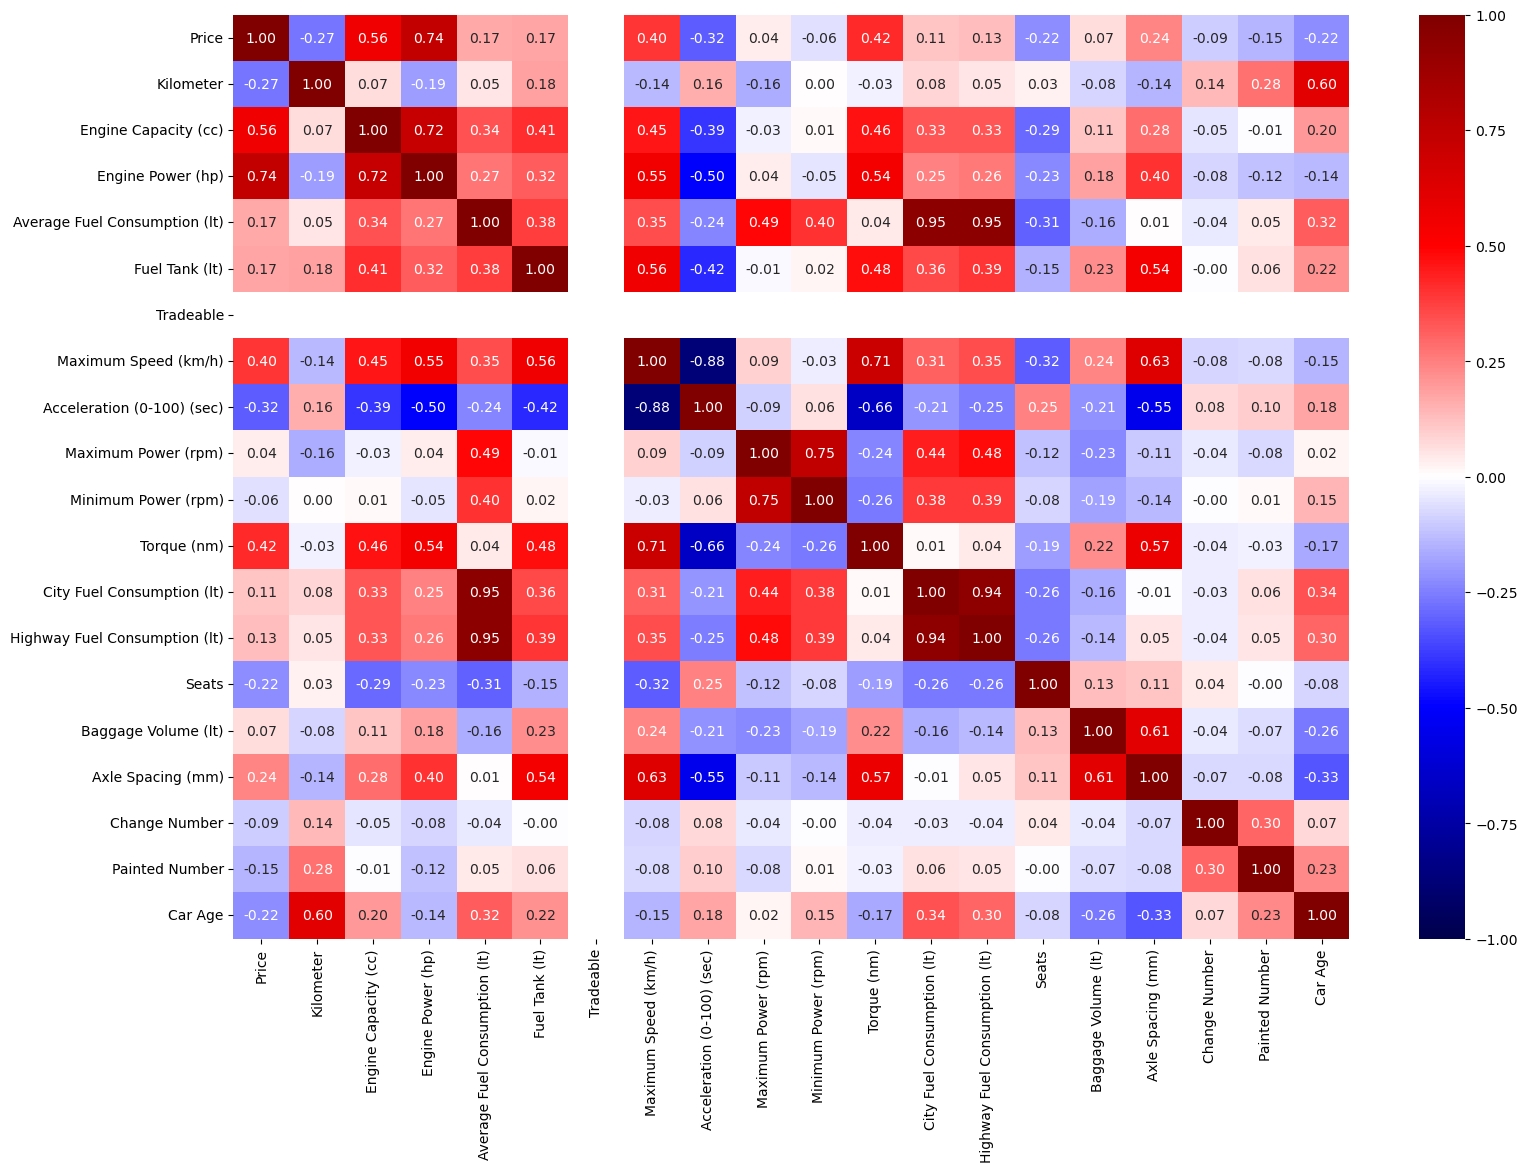

In [67]:
plt.figure(figsize=[18,12])
sns.heatmap(numeric_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt='.2f')

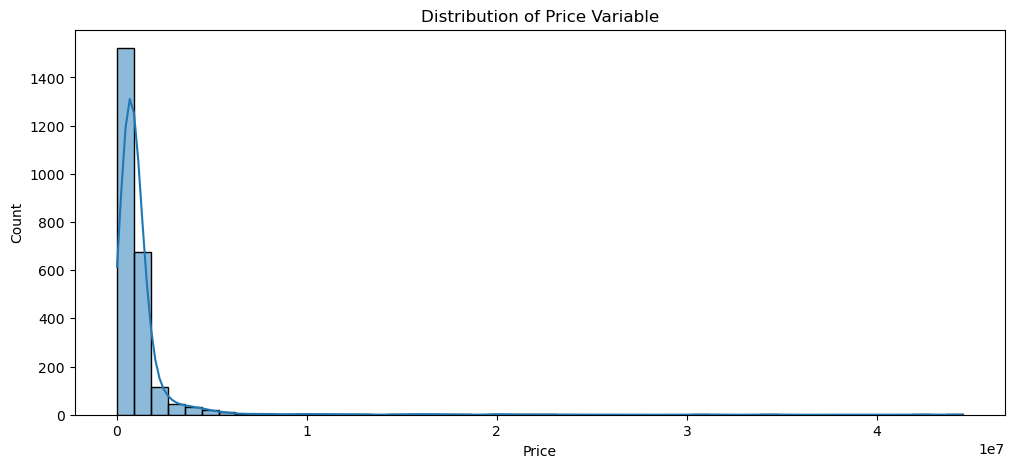

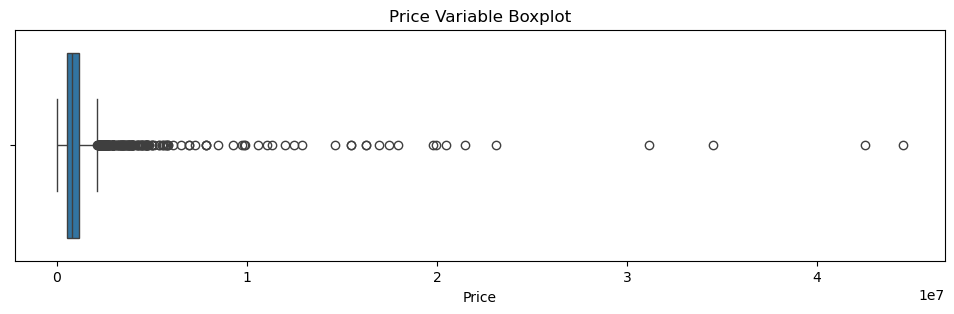

Skewness: 10.736892413773752
Kurtosis: 155.00859890296348


In [68]:
#Analysis of Outliers
# Histogram and KDE Plot
plt.figure(figsize=(12, 5))
sns.histplot(numeric_df["Price"], bins=50, kde=True)
plt.title("Distribution of Price Variable")
plt.show()

# Boxplot
plt.figure(figsize=(12, 3))
sns.boxplot(x=numeric_df["Price"])
plt.title("Price Variable Boxplot")
plt.show()

# Skewness and Kurtosis Calculation
skewness = skew(numeric_df["Price"])
kurt = kurtosis(numeric_df["Price"])
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

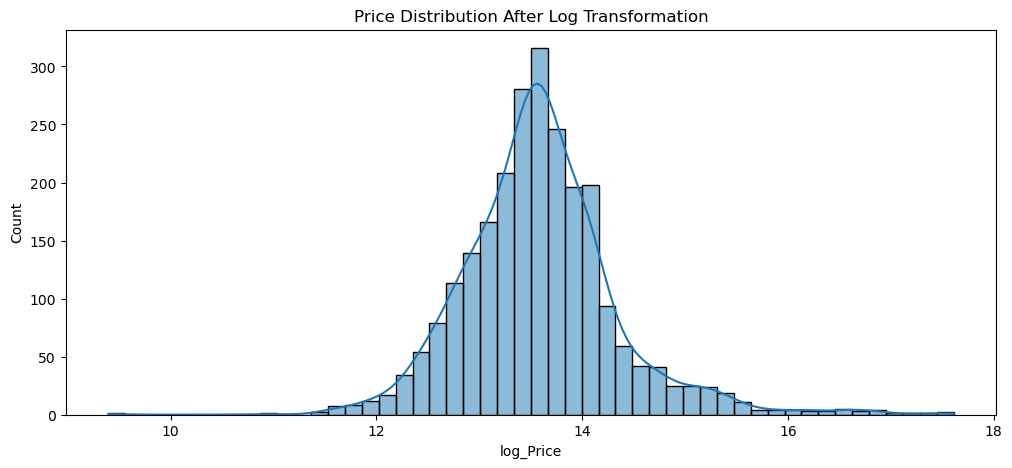

In [69]:
# We apply log transformation because the Price column is skewed to the right
numeric_df["log_Price"] = np.log1p(numeric_df["Price"]) # We use log(1 + Price) to avoid zero values

# Histogram after log transformation
plt.figure(figsize=(12, 5))
sns.histplot(numeric_df["log_Price"], bins=50, kde=True)
plt.title("Price Distribution After Log Transformation")
plt.show()

In [72]:
# Calculate the correlation matrix
numeric_df_corr = numeric_df.corr()

# Select correlations with 'price'
numeric_df_corr = numeric_df_corr['Price']

# Filter correlations greater than 0.5
numeric_df_corr = numeric_df_corr[abs(numeric_df_corr) > 0.4]

# Print the results
print("Numerical columns and ratios with correlation greater than 0.4 with Price:")
for column, corr_value in numeric_df_corr.items():
    print(f"{column}: {corr_value}")

Numerical columns and ratios with correlation greater than 0.4 with Price:
Price: 1.0
Engine Capacity (cc): 0.5560887448317938
Engine Power (hp): 0.7416829416714966
Torque (nm): 0.419949351947036
log_Price: 0.6748552004786457


<Axes: >

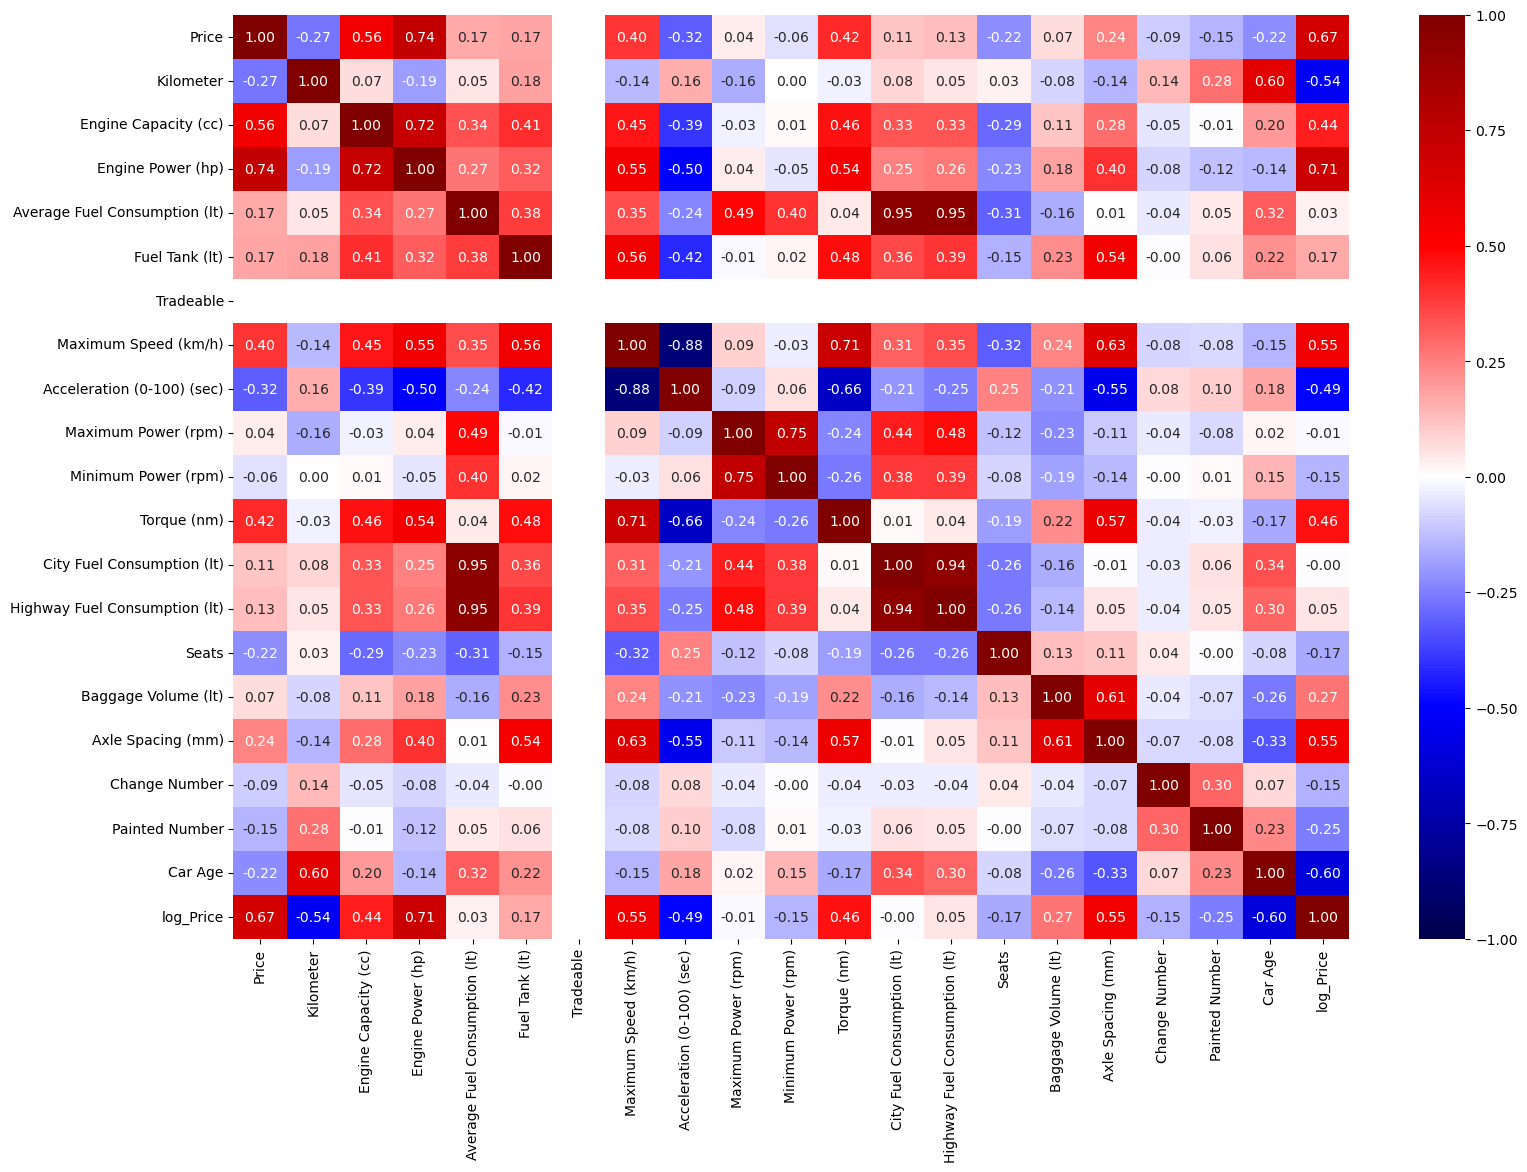

In [73]:
plt.figure(figsize=[18,12])
sns.heatmap(numeric_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt='.2f')

In [75]:
# Calculate the correlation matrix
numeric_df_corr = numeric_df.corr()

# Select correlations with 'price'
numeric_df_corr = numeric_df_corr['log_Price']

# Filter correlations greater than 0.5
numeric_df_corr = numeric_df_corr[abs(numeric_df_corr) > 0.4]

# Print the results
print("Numerical columns and ratios with correlation greater than 0.4 with log_Price:")
for column, corr_value in numeric_df_corr.items():
    print(f"{column}: {corr_value}")

Numerical columns and ratios with correlation greater than 0.4 with log_Price:
Price: 0.6748552004786457
Kilometer: -0.5359512339999823
Engine Capacity (cc): 0.43997468936011896
Engine Power (hp): 0.7099169057641149
Maximum Speed ​​(km/h): 0.5546931604262582
Acceleration (0-100) (sec): -0.49425108980180543
Torque (nm): 0.4630657818252468
Axle Spacing (mm): 0.5522572349135705
Car Age: -0.5996120146018357
log_Price: 1.0


In [76]:
dummy_df["log_Price"] = np.log1p(dummy_df["Price"])

In [77]:
categoric_columns = ["Price",'log_Price', 'Brand_BMW', 'Brand_Citroen', 'Brand_Fiat',
       'Brand_Ford', 'Brand_Hyundai', 'Brand_Mercedes - Benz', 'Brand_Opel',
       'Brand_Other', 'Brand_Peugeot', 'Brand_Renault', 'Brand_Seat',
       'Brand_Skoda', 'Brand_Toyota', 'Brand_Volkswagen','Gear Type_Otomatik',
       'Gear Type_Yarı Otomatik', 'Fuel Type_Dizel', 'Fuel Type_Elektrik',
       'Fuel Type_Hibrit', 'Fuel Type_LPG & Benzin', 'Body Type_Coupe',
       'Body Type_Hatchback/3', 'Body Type_Hatchback/5', 'Body Type_MPV',
       'Body Type_Roadster', 'Body Type_SUV', 'Body Type_Sedan',
       'Body Type_Station wagon', 'Traction_AWD (Elektronik)',
       'Traction_Arkadan İtiş', 'Traction_Önden Çekiş', 'Seller_Sahibinden',
       'Seller_Yetkili Bayiden', 'Vehicle Class_B Segment',
       'Vehicle Class_Bilinmiyor', 'Vehicle Class_C Segment',
       'Vehicle Class_D Segment', 'Vehicle Class_E Segment',
       'Vehicle Class_F Segment', 'Vehicle Class_G Segment',
       'Vehicle Class_H Segment']
categoric_df = dummy_df[categoric_columns]
categoric_df

,Price,log_Price,Brand_BMW,Brand_Citroen,Brand_Fiat,Brand_Ford,Brand_Hyundai,Brand_Mercedes - Benz,Brand_Opel,Brand_Other,...,Seller_Sahibinden,Seller_Yetkili Bayiden,Vehicle Class_B Segment,Vehicle Class_Bilinmiyor,Vehicle Class_C Segment,Vehicle Class_D Segment,Vehicle Class_E Segment,Vehicle Class_F Segment,Vehicle Class_G Segment,Vehicle Class_H Segment
0,745000.0,13.521141,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,649500.0,13.383960,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,739500.0,13.513731,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,759000.0,13.539758,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,375000.0,12.834684,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,1125000.0,13.933294,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2495,1500000.0,14.220976,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2496,615000.0,13.329379,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2497,945000.0,13.758941,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


<Axes: >

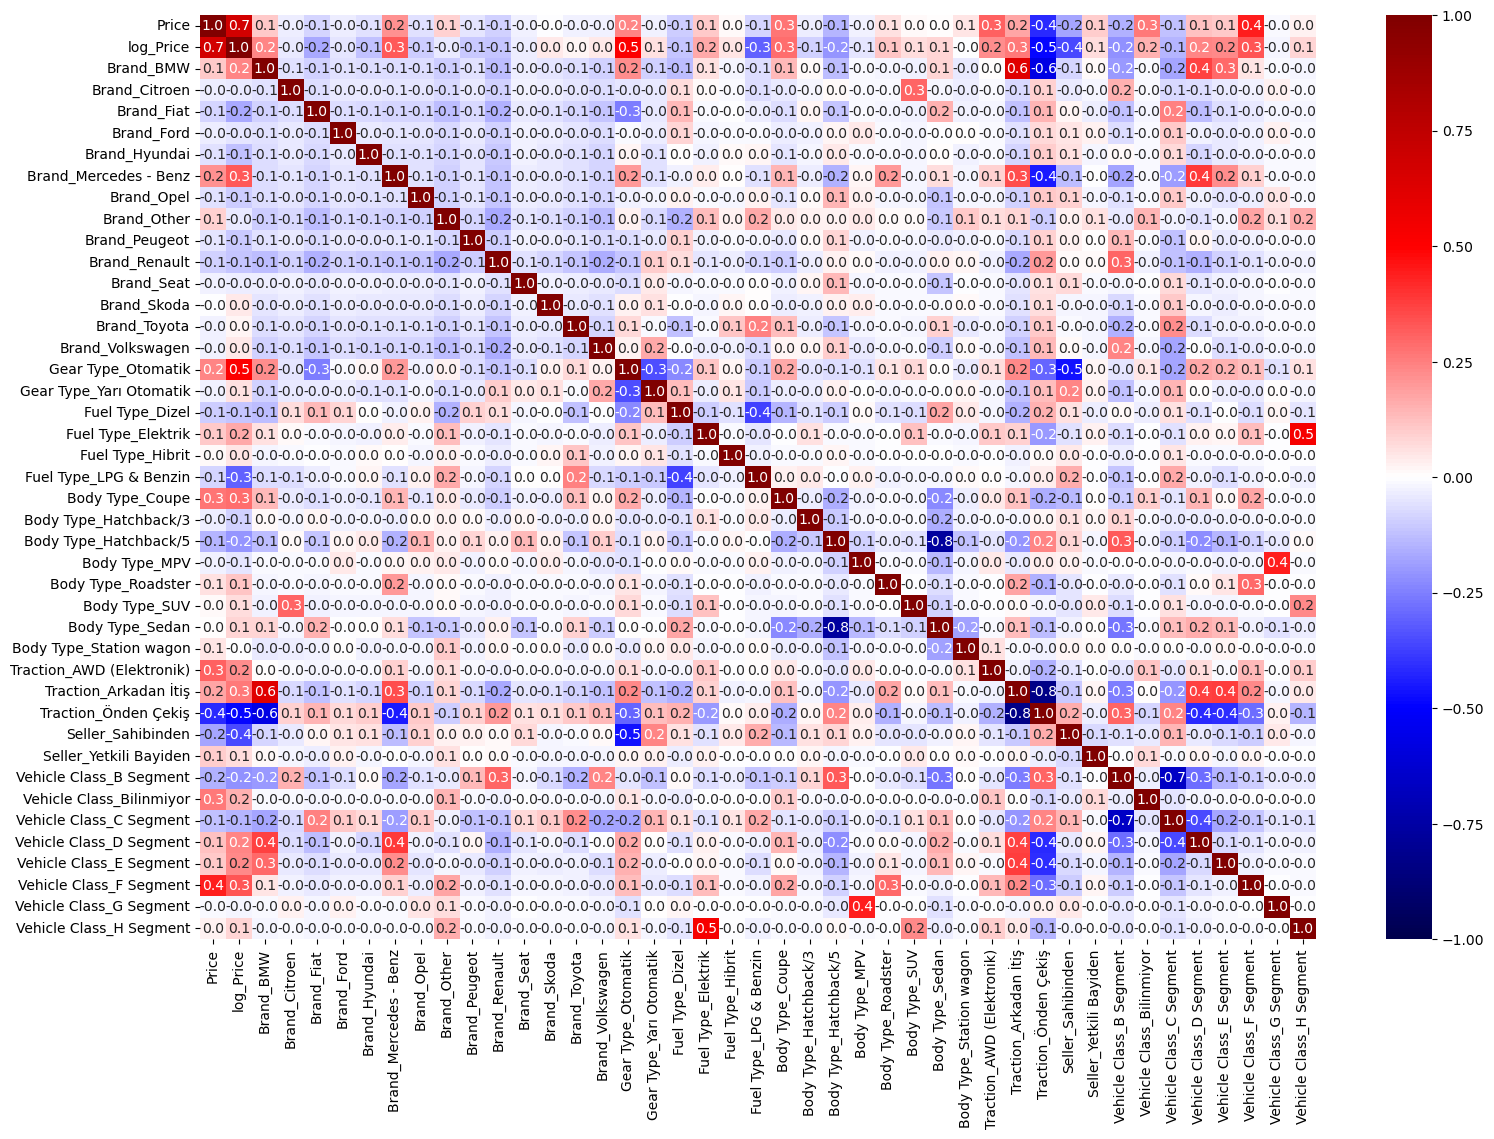

In [78]:
plt.figure(figsize=[18,12])
sns.heatmap(categoric_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt='.1f')

In [79]:
# Calculate the correlation matrix
categoric_df_corr = categoric_df.corr()

# Select correlations with 'price'
categoric_df_corr = categoric_df_corr['log_Price']

# Filter correlations greater than 0.5
categoric_df_corr = categoric_df_corr[abs(categoric_df_corr) > 0.4]

# Sonuçları yazdıralım
print("Categorical columns and their ratios with correlation greater than 0.4 with log_Price:")
for column, corr_value in categoric_df_corr.items():
    print(f"{column}: {corr_value}")

Categorical columns and their ratios with correlation greater than 0.4 with log_Price:
Price: 0.6748552004786457
log_Price: 1.0
Gear Type_Otomatik: 0.5126832639440334
Traction_Önden Çekiş: -0.48695631766824415


In [80]:
high_corr_col = ['Car Age','Axle Spacing (mm)','Maximum Speed ​​(km/h)','Engine Power (hp)','Engine Capacity (cc)','Kilometer','Gear Type_Otomatik','Traction_Önden Çekiş']

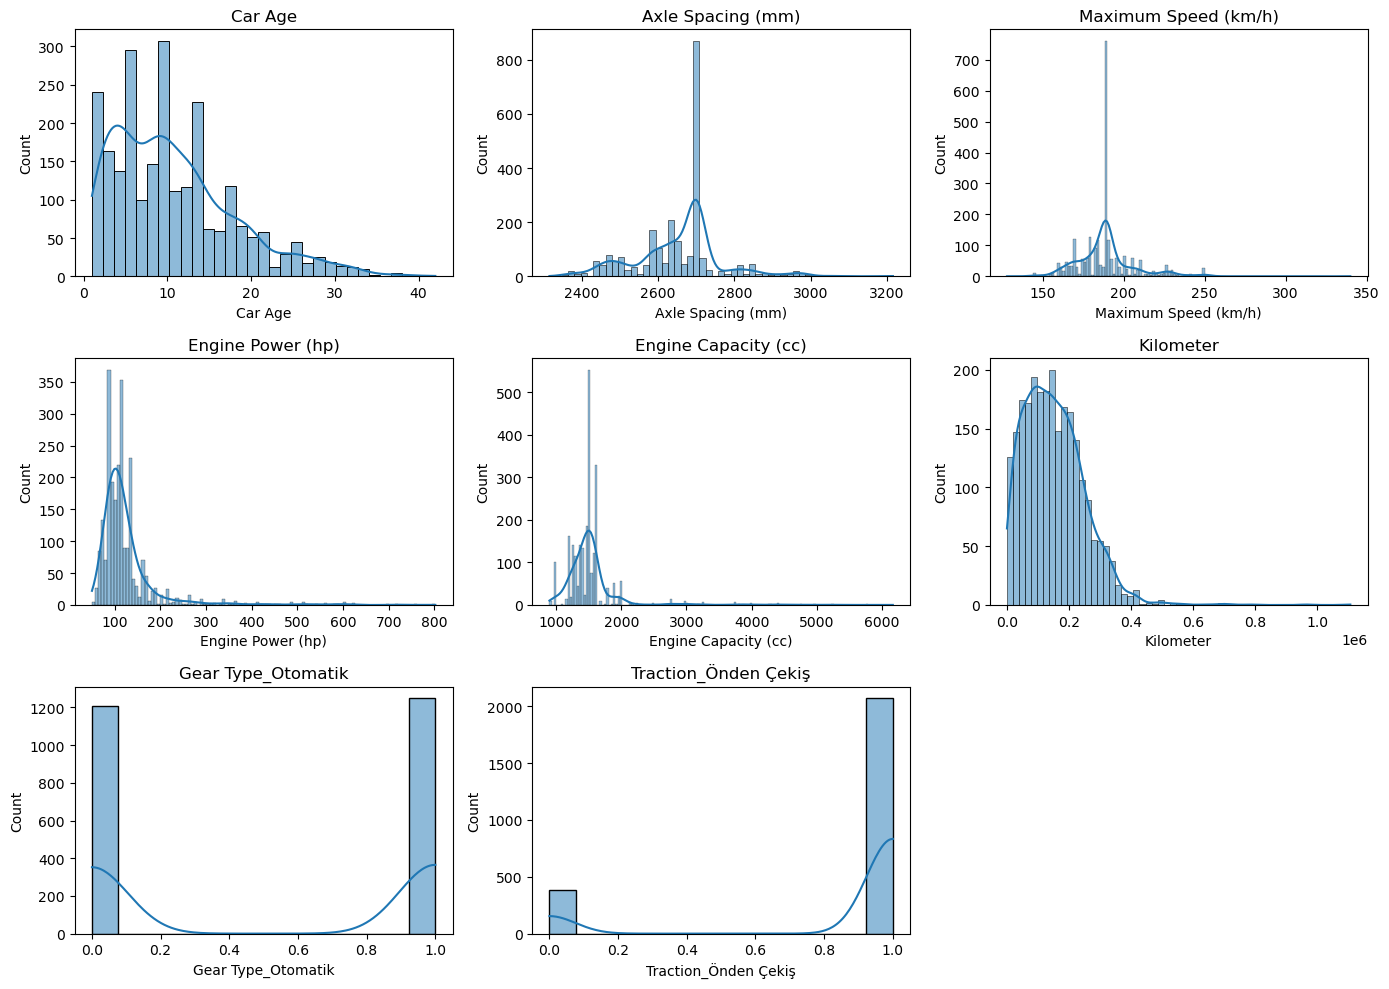

In [81]:
# Let's examine the distribution of numerical values ​​to decide how to fill in the gaps
high_corr_df = dummy_df[high_corr_col]
plt.figure(figsize=(14,10))
for i, col in enumerate(high_corr_df):
    plt.subplot(3,3, i+1)
    sns.histplot(high_corr_df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


In [82]:
dummy_df['Kilometer_log'] = np.log1p(dummy_df['Kilometer'])
dummy_df['Engine Power (hp)_log'] = np.log1p(dummy_df['Engine Power (hp)'])
dummy_df['Engine Capacity (cc)_log'] = np.log1p(dummy_df['Engine Capacity (cc)'])


In [83]:
selected_columns = ['Car Age','Axle Spacing (mm)','Maximum Speed ​​(km/h)',
                    'Gear Type_Otomatik','Traction_Önden Çekiş','Kilometer_log','Engine Power (hp)_log',
                    'Engine Capacity (cc)_log','Price','log_Price']
df = dummy_df[selected_columns]

In [84]:
x = df.drop(['Price', 'log_Price'], axis=1)
y = df['Price']


In [85]:
x_log = df.drop(['Price', 'log_Price'], axis=1)
y_log = df['log_Price']


In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)# only do it once since x and x_log are the same

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Eğitim ve test ayırma
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(x_scaled, y_log, test_size=0.2, random_state=42)

# Normal Price Modeli
model_normal = LinearRegression()
model_normal.fit(x_train, y_train)
y_pred_normal = model_normal.predict(x_test)
rmse_normal = mean_squared_error(y_test, y_pred_normal, squared=False)

# Log Price Modeli
model_log = LinearRegression()
model_log.fit(x_train_log, y_train_log)
y_pred_log = model_log.predict(x_test_log)

# Log'tan geri dönüştürme
y_pred_log_transformed = np.expm1(y_pred_log)
y_test_log_transformed = np.expm1(y_test_log)
rmse_log = mean_squared_error(y_test_log_transformed, y_pred_log_transformed, squared=False)

print(f"Normal RMSE: {rmse_normal}")
print(f"Log Transformed RMSE: {rmse_log}")

Normal RMSE: 855998.2877281354
Log Transformed RMSE: 333110.1406413802


In [88]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Normal Model
r2_normal = r2_score(y_test, y_pred_normal)
rmse_normal = mean_squared_error(y_test, y_pred_normal, squared=False)

# Log Model
r2_log = r2_score(y_test_log, y_pred_log)

y_pred_log_transformed = np.expm1(y_pred_log)
y_test_log_transformed = np.expm1(y_test_log)

rmse_log = mean_squared_error(y_test_log_transformed, y_pred_log_transformed, squared=False)

print(f"Normal R²: {r2_normal}")
print(f"Normal RMSE: {rmse_normal}")
print(f"Log Transformed R²: {r2_log}")
print(f"Log Transformed RMSE: {rmse_log}")


Normal R²: -0.5115573385233938
Normal RMSE: 855998.2877281354
Log Transformed R²: 0.7328593634861028
Log Transformed RMSE: 333110.1406413802


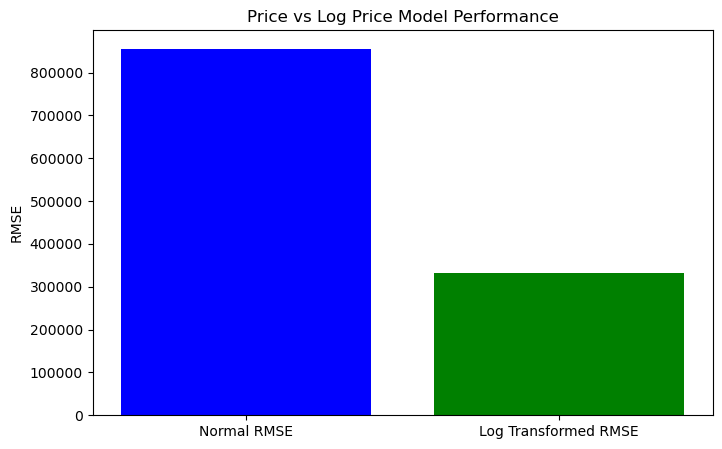

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(["Normal RMSE", "Log Transformed RMSE"], [rmse_normal, rmse_log], color=['blue', 'green'])
plt.title("Price vs Log Price Model Performance")
plt.ylabel("RMSE")
plt.show()

In [90]:
df.head()

,Car Age,Axle Spacing (mm),Maximum Speed ​​(km/h),Gear Type_Otomatik,Traction_Önden Çekiş,Kilometer_log,Engine Power (hp)_log,Engine Capacity (cc)_log,Price,log_Price
0,4.0,2636.0,212.000000,0,1,11.820418,4.875197,7.377134,745000.0,13.521141
1,8.0,2589.0,168.000000,0,1,11.849405,4.330733,7.287561,649500.0,13.383960
2,4.0,2700.0,189.215527,0,1,11.652696,4.488636,7.171273,739500.0,13.513731
3,9.0,2685.0,200.000000,1,1,12.152150,4.919981,7.377134,759000.0,13.539758
4,18.0,2686.0,171.000000,0,1,12.653962,4.394449,7.287561,375000.0,12.834684


In [91]:
df.drop(columns= ['Price'])

,Car Age,Axle Spacing (mm),Maximum Speed ​​(km/h),Gear Type_Otomatik,Traction_Önden Çekiş,Kilometer_log,Engine Power (hp)_log,Engine Capacity (cc)_log,log_Price
0,4.0,2636.0,212.000000,0,1,11.820418,4.875197,7.377134,13.521141
1,8.0,2589.0,168.000000,0,1,11.849405,4.330733,7.287561,13.383960
2,4.0,2700.0,189.215527,0,1,11.652696,4.488636,7.171273,13.513731
3,9.0,2685.0,200.000000,1,1,12.152150,4.919981,7.377134,13.539758
4,18.0,2686.0,171.000000,0,1,12.653962,4.394449,7.287561,12.834684
...,...,...,...,...,...,...,...,...,...
2494,1.0,2700.0,189.215527,1,1,9.680406,4.488636,7.090910,13.933294
2495,13.0,2700.0,189.215527,1,0,11.247018,5.365976,7.439265,14.220976
2496,12.0,2700.0,189.215527,1,1,11.842236,4.158883,7.171273,13.329379
2497,6.0,2700.0,189.215527,1,1,11.547337,4.736198,7.314220,13.758941


In [92]:
import statsmodels.api as sm
# Definition of variables
X = df.iloc[:, :-1] 
y = df.iloc[:, -1] 

# Adding a Constant Term to the Model
X = sm.add_constant(X)
# Creating the Model
model = sm.OLS(y, X)

# Training the Model
fit2 = model.fit()
# Display the summary table for the model we created
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1730.
Date:                Sun, 09 Mar 2025   Prob (F-statistic):               0.00
Time:                        00:40:35   Log-Likelihood:                -320.80
No. Observations:                2453   AIC:                             661.6
Df Residuals:                    2443   BIC:                             719.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        8.3642      0.279     29.935      0.000       7.816       8.912
Car Age                     -0.0440      0.001    -37.395      0.000      -0.046      -0.042
Axle Spacing (mm)            0.0004   7.11e-05      4.992      0.000       0.000       0.000
Maximum Speed ​​(km/h)       0.0012      0.000      2.664      0.008       0.000       0.002
Gear Type_Otomatik           0.1300      0.013      9.843      0.000       0.104       0.156
Traction_Önden Çekiş        -0.2212      0.022    -10.156      0.000      -0.264      -0.178
Kilometer_log               -0.0818      0.009     -9.462      0.000      -0.099      -0.065
Engine Power (hp)_log        0.5717      0.032     17.923      0.000       0.509       0.634
Engine Capacity (cc)_log     0.3829      0.043      8.923      0.000       0.299       0.467
Price                     7.429e-08   3.52e-09     21.083      0.000    6.74e-08    8.12e-08
==============================================================================
Omnibus:                      961.637   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61051.824
Skew:                          -1.014   Prob(JB):                         0.00
Kurtosis:                      27.356   Cond. No.                     1.28e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
# Creating the Model
lr1 = LinearRegression()

X = df.iloc[:, :-1] 
y = df.iloc[:, -1] 

# Modeli Eğitme
lr1.fit(X, y)

# R2 Değeri
r_squared1 = lr1.score(X,y)
print("R2:", round(r_squared1,3))

# Adjusted R2 Değeri
adjusted_r_squared1 = 1 - (1-r_squared1)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R2:", round(adjusted_r_squared1,3))

R2: 0.864
Adjusted R2: 0.864


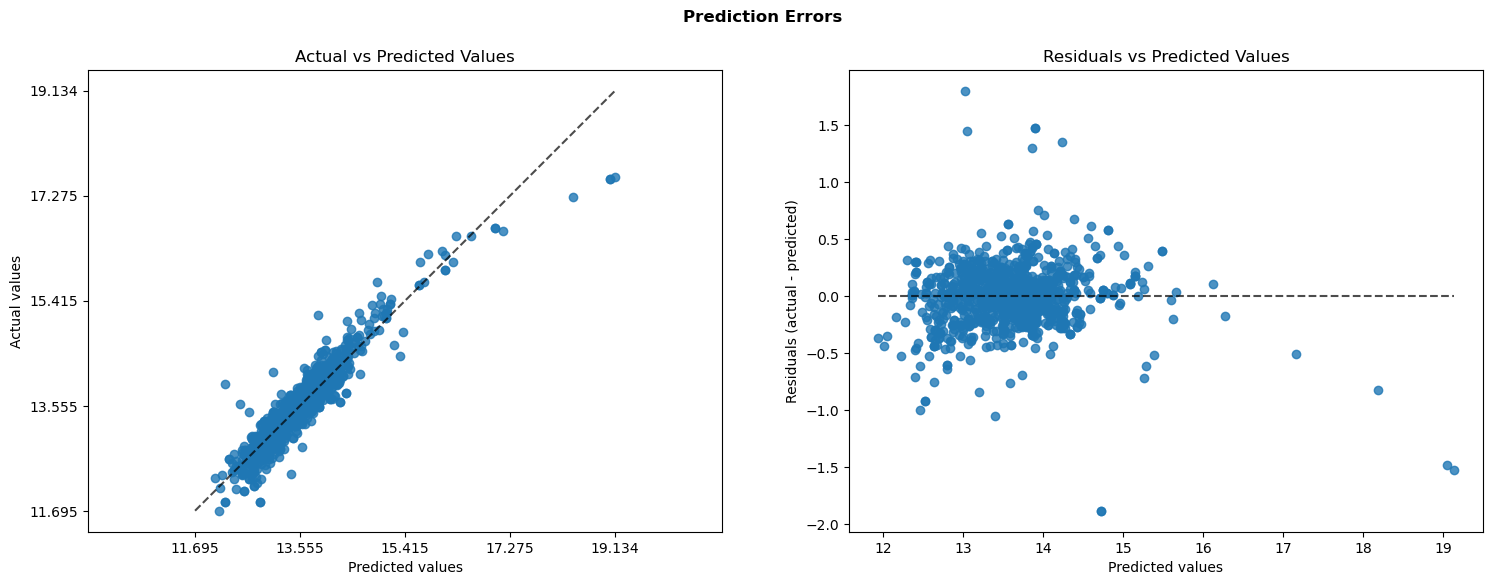

In [94]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

# Add a constant term to X (if you added it in the fit stage, you have to do it again)
X = sm.add_constant(X)

y_pred = fit2.predict(X)

fig, axs = plt.subplots(1, 2, figsize=[18, 6])
fig.suptitle("Prediction Errors", weight="bold")

PredictionErrorDisplay.from_predictions(y, y_pred, kind="actual_vs_predicted", ax=axs[0])
axs[0].set_title("Actual vs Predicted Values")

PredictionErrorDisplay.from_predictions(y, y_pred, kind="residual_vs_predicted", ax=axs[1])
axs[1].set_title("Residuals vs Predicted Values")

plt.show()


In [95]:
dummy_df.to_pickle('dummy_salary_data.pkl')